# NBA Predicting Game Attendance and Online Viewership 

I started this project because of my fascination with the NBA and my love for diving deep into the game through NBA 2K on my PlayStation. While playing, I became captivated by the stats behind each game—like shooting percentages, rebounds, steals, blocks, and assists—and how these elements could shape each quarter’s outcome. This sparked my curiosity about the real NBA: what if I could predict which team would win based on these kinds of insights?

Beyond my own interest, this project is exciting because it taps into the global popularity of the NBA, where each game is a complex mix of strategy, performance, and player dynamics. By predicting game outcomes, I can explore the data-driven factors that influence wins and losses, from team stats and player performances to head-to-head records. This project also highlights how data analytics can help us understand and appreciate the game more deeply. I’m thrilled to combine my love for basketball with the power of machine learning, using predictive models to uncover the key patterns behind the world’s favorite sport

In [1]:

import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle_data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [102]:
# load the data 
players = pd.read_csv("kaggle_data/players.csv")
teams = pd.read_csv("kaggle_data/teams.csv")
ranking = pd.read_csv("kaggle_data/ranking.csv")
games_details = pd.read_csv("kaggle_data/games_details.csv",low_memory = False)
games = pd.read_csv("kaggle_data/games.csv")

In [6]:
teams

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends
5,0,1610612743,1976,2019,DEN,Nuggets,1976,Denver,Pepsi Center,19099.0,Stan Kroenke,Tim Connelly,Michael Malone,No Affiliate
6,0,1610612745,1967,2019,HOU,Rockets,1967,Houston,Toyota Center,18104.0,Tilman Fertitta,Daryl Morey,Mike D'Antoni,Rio Grande Valley Vipers
7,0,1610612746,1970,2019,LAC,Clippers,1970,Los Angeles,Staples Center,19060.0,Steve Ballmer,Michael Winger,Doc Rivers,Agua Caliente Clippers of Ontario
8,0,1610612747,1948,2019,LAL,Lakers,1948,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
9,0,1610612748,1988,2019,MIA,Heat,1988,Miami,AmericanAirlines Arena,19600.0,Micky Arison,Pat Riley,Erik Spoelstra,Sioux Falls Skyforce


We have the 29 teams in NBA league,for the 2024 is number of team 30.

In [7]:
ranking.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612743,0,22022,2022-12-22,West,Denver,30,19,11,0.633,10-3,9-8,NaN
1,1610612763,0,22022,2022-12-22,West,Memphis,30,19,11,0.633,13-2,6-9,NaN
2,1610612740,0,22022,2022-12-22,West,New Orleans,31,19,12,0.613,13-4,6-8,NaN
3,1610612756,0,22022,2022-12-22,West,Phoenix,32,19,13,0.594,14-4,5-9,NaN
4,1610612746,0,22022,2022-12-22,West,LA Clippers,33,19,14,0.576,11-7,8-7,NaN


In [8]:
ranking.SEASON_ID.unique()

array([22022, 12022, 22021, 12021, 22020, 12020, 22019, 12019, 22013,
       12013, 22012, 12012, 22011, 12011, 22010, 12010, 22009, 12009,
       22008, 12008, 22007, 12007, 22006, 12006, 22005, 12005, 22004,
       12004, 22003, 12003, 22002, 22018, 12018, 22017, 12017, 22016,
       12016, 22015, 12015, 22014, 12014])

In NBA data, seasons are often represented with prefixes (like 1 and 2) to distinguish between the regular season and the playoffs. In this format:

**"1YYYY"**: Likely represents the regular season of the year. For instance, "12022" would indicate the 2022 regular season.

**"2YYYY"**: Likely represents the playoffs of the same year. So, "22022" would represent the 2022 playoffs.

This convention is helpful in datasets for distinguishing between regular season stats and playoff stats, as player and team performance can vary significantly between the two.

In [73]:
games_details.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0


In [10]:
games_details.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS',
       'PLUS_MINUS'],
      dtype='object')

MIN: Minutes played 

FGM: Field Goals Made

FGA: Field Goals Attempted

FG_PCT: Field Goal Percentage (calculated as FGM / FGA)

FG3M: Three-Point Field Goals Made

FG3A: Three-Point Field Goals Attempted

FG3_PCT: Three-Point Field Goal Percentage (calculated as FG3M / FG3A)

FTM: Free Throws Made

FTA: Free Throws Attempted

FT_PCT: Free Throw Percentage (calculated as FTM / FTA)

OREB: Offensive Rebounds

DREB: Defensive Rebounds

REB: Total Rebounds (OREB + DREB)

AST: Assists

STL: Steals

BLK: Blocks

TO: Turnovers

PF: Personal Fouls

PTS: Points Scored


In [74]:
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


In [9]:
games.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

**PTS_home:** Points scored by the home team

**FG_PCT_home:** Field Goal Percentage of the home team (FGM / FGA)

**FT_PCT_home:** Free Throw Percentage of the home team (FTM / FTA)

**FG3_PCT_home:** Three-Point Field Goal Percentage of the home team (FG3M / FG3A)

**AST_home:** Assists made by the home team

**REB_home:** Total rebounds (OREB + DREB) for the home team

**TEAM_ID_away:** Identifier for the away team (usually a unique ID)

**PTS_away:** Points scored by the away team

**FG_PCT_away**: Field Goal Percentage of the away team (FGM / FGA)

**FT_PCT_away:** Free Throw Percentage of the away team (FTM / FTA)

**FG3_PCT_away:** Three-Point Field Goal Percentage of the away team (FG3M / FG3A)

**AST_away:** Assists made by the away team

**REB_away:** Total rebounds (OREB + DREB) for the away team

**HOME_TEAM_WINS:** A binary indicator (often 0 or 1) representing whether the home team won the game (1) or not (0)

I’d like to analyze the Celtics' team rankings over the years, focusing on both the regular season and playoffs. By plotting the Celtics’ rankings in separate charts—one for the regular season and one for the playoffs—we can gain insights into the team’s performance consistency and see if there’s improvement or decline as they transition into the playoffs. This approach could be applied to other teams as well, but I’m choosing the Celtics for this analysis.

These two plots will allow us to assess the Celtics’ strength during the regular season and determine if their performance typically intensifies in the playoffs.

**Identifying Consistency:** I’ll see if the Celtics maintain strong rankings throughout both the regular season and playoffs.

**Spotting Improvement or Decline:** By comparing the two plots, i can assess whether the team tends to improve or struggle during playoffs, which is valuable for understanding team dynamics under playoff pressure.

**Performance Trends Over Time:** Observing rankings year by year can reveal if the team has become more competitive over recent years or faced periods of decline.


In [12]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


First i need to do a copy of the ranking dataframe and extract data only about Celtics.

In [109]:
games.head()    

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


Games Table: This table contains the scores for each game. By creating separate data frames for home and away games, I can analyze the team's performance based on whether they played at home or away.

In [110]:
teams = teams[["TEAM_ID", "CITY", "NICKNAME"]]
teams.head()

,TEAM_ID,CITY,NICKNAME
0,1610612737,Atlanta,Hawks
1,1610612738,Boston,Celtics
2,1610612740,New Orleans,Pelicans
3,1610612741,Chicago,Bulls
4,1610612742,Dallas,Mavericks


In [111]:
home_games = pd.merge(games, teams, left_on = "TEAM_ID_home", right_on = "TEAM_ID", how = "inner")

In [54]:
home_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,TEAM_ID,CITY,NICKNAME
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,117.0,0.478,0.815,0.321,23.0,44.0,1,1610612740,New Orleans,Pelicans
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,112.0,0.561,0.765,0.333,20.0,37.0,1,1610612762,Utah,Jazz
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,106.0,0.470,0.682,0.433,20.0,46.0,1,1610612739,Cleveland,Cavaliers
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,93.0,0.392,0.735,0.261,15.0,46.0,1,1610612755,Philadelphia,76ers
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,110.0,0.500,0.773,0.292,20.0,47.0,0,1610612737,Atlanta,Hawks


In [112]:
home_games = home_games.rename(columns={
    "CITY" : "city_home",
    "NICKNAME" : "nickname_home"
})

In [113]:
both_games = pd.merge(home_games, teams, left_on= "TEAM_ID_away", right_on="TEAM_ID", how="inner")
both_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,TEAM_ID_x,city_home,nickname_home,TEAM_ID_y,CITY,NICKNAME
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,0.321,23.0,44.0,1,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,0.333,20.0,37.0,1,1610612762,Utah,Jazz,1610612764,Washington,Wizards
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,0.433,20.0,46.0,1,1610612739,Cleveland,Cavaliers,1610612749,Milwaukee,Bucks
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,0.261,15.0,46.0,1,1610612755,Philadelphia,76ers,1610612765,Detroit,Pistons
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,0.292,20.0,47.0,0,1610612737,Atlanta,Hawks,1610612741,Chicago,Bulls


In [114]:
both_games = both_games.drop(columns=["TEAM_ID_x", "TEAM_ID_y","TEAM_ID_home", "TEAM_ID_away"])


In [115]:
both_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,...,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,city_home,nickname_home,CITY,NICKNAME
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,126.0,0.484,0.926,0.382,...,0.478,0.815,0.321,23.0,44.0,1,New Orleans,Pelicans,San Antonio,Spurs
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,120.0,0.488,0.952,0.457,...,0.561,0.765,0.333,20.0,37.0,1,Utah,Jazz,Washington,Wizards
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,114.0,0.482,0.786,0.313,...,0.470,0.682,0.433,20.0,46.0,1,Cleveland,Cavaliers,Milwaukee,Bucks
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,113.0,0.441,0.909,0.297,...,0.392,0.735,0.261,15.0,46.0,1,Philadelphia,76ers,Detroit,Pistons
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,108.0,0.429,1.000,0.378,...,0.500,0.773,0.292,20.0,47.0,0,Atlanta,Hawks,Chicago,Bulls


From the combined games DataFrame, I want to extract only the points scored in each game, the host (home) and visitor teams, the team names and cities, and whether the home team won.

In [122]:
games_stats = both_games.copy()
games_stats.columns


Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home',
       'FG3_PCT_home', 'AST_home', 'REB_home', 'PTS_away', 'FG_PCT_away',
       'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS',
       'city_home', 'nickname_home', 'CITY', 'NICKNAME'],
      dtype='object')

In [124]:
# Correct way to select specific columns
games_stats = games_stats[["GAME_DATE_EST", "GAME_ID", "GAME_STATUS_TEXT", "SEASON", "city_home", "nickname_home", "CITY", "NICKNAME", "PTS_home", "PTS_away", "HOME_TEAM_WINS"]]
games_stats.head()


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,SEASON,city_home,nickname_home,CITY,NICKNAME,PTS_home,PTS_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,2022,New Orleans,Pelicans,San Antonio,Spurs,126.0,117.0,1
1,2022-12-22,22200478,Final,2022,Utah,Jazz,Washington,Wizards,120.0,112.0,1
2,2022-12-21,22200466,Final,2022,Cleveland,Cavaliers,Milwaukee,Bucks,114.0,106.0,1
3,2022-12-21,22200467,Final,2022,Philadelphia,76ers,Detroit,Pistons,113.0,93.0,1
4,2022-12-21,22200468,Final,2022,Atlanta,Hawks,Chicago,Bulls,108.0,110.0,0


In [65]:
total_wins_and_losses =games["HOME_TEAM_WINS"].value_counts()
total_wins_and_losses

HOME_TEAM_WINS
1    15645
0    11006
Name: count, dtype: int64

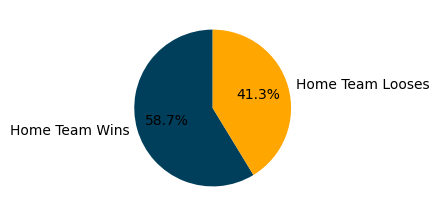

In [67]:

plt.pie(total_wins_and_losses, labels = ["Home Team Wins", "Home Team Looses"], autopct = "%1.1f%%", startangle = 90, colors = ["#003f5c", "#ffa600"])
plt.show()

This plot indicates that there are more home wins than losses.

I'll create two plots: Home wins for each team and home losses for each team .


In [68]:
# Calculate the number of wins for each team
wins_by_team = games.groupby('TEAM_NAME')['HOME_TEAM_WIN'].sum().reset_index()
wins_by_team.head()

KeyError: 'TEAM_NAME'